In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
titanicDF = pd.read_csv('train.csv')
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

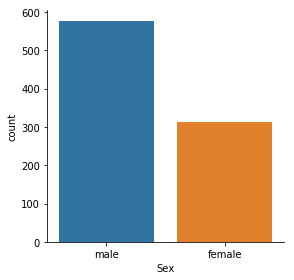

In [4]:
sns.factorplot('Sex',kind='count',data=titanicDF)

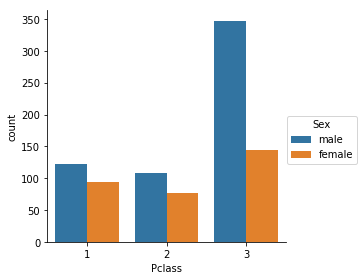

In [5]:
sns.factorplot('Pclass',kind='count',data=titanicDF,hue='Sex')

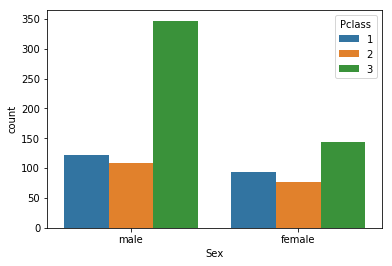

In [6]:
sns.countplot('Sex',data=titanicDF,hue='Pclass')

In [7]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
titanicDF[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanicDF['person'] = titanicDF[['Age','Sex']].apply(male_female_child,axis=1)

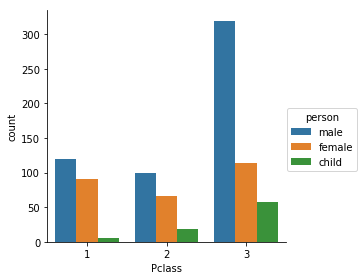

In [11]:
sns.factorplot('Pclass',kind='count',data=titanicDF,hue='person')

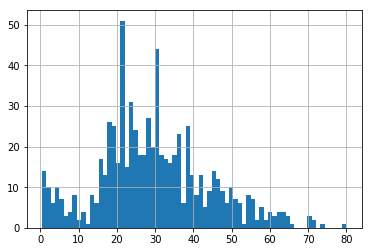

In [12]:
# Quick way to create a histogram using pandas
titanicDF['Age'].hist(bins=70)

In [13]:
# We could also get a quick overall comparison of male,female,child
titanicDF['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

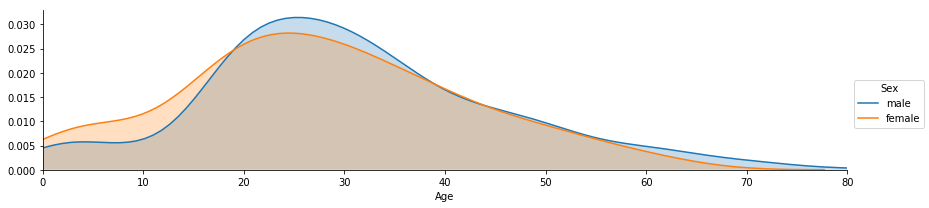

In [14]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanicDF, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanicDF['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

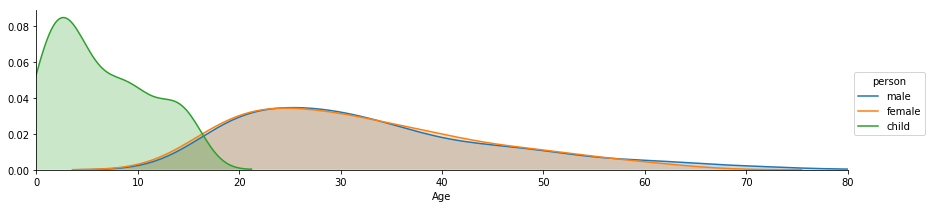

In [15]:
# trying with 'person'
fig = sns.FacetGrid(titanicDF, hue="person",aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

oldest = titanicDF['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

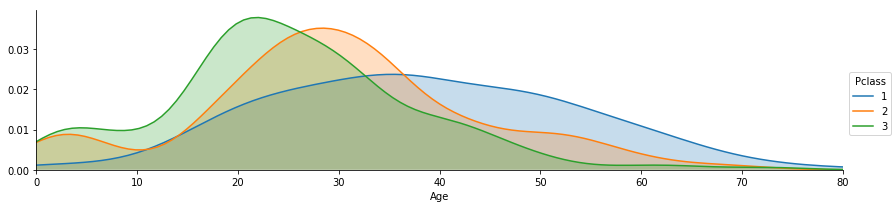

In [16]:
# Let's do the same for class vs. age by changing the hue argument:
fig = sns.FacetGrid(titanicDF, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [17]:
# First we'll drop the NaN values and create a new object, deck
deck = titanicDF['Cabin'].dropna()

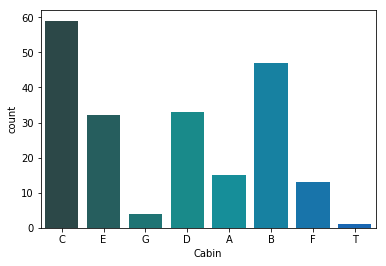

In [18]:
# Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

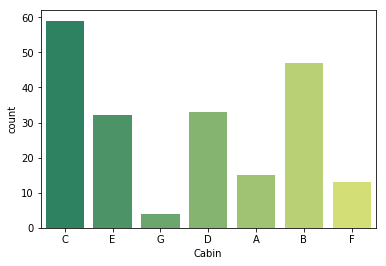

In [19]:
# Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot('Cabin',data=cabin_df,palette='summer')

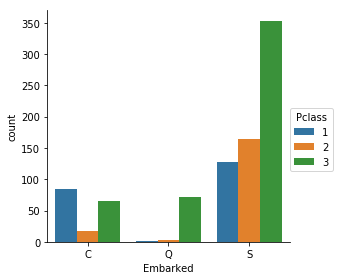

In [20]:
"""
Quick note: I used 'winter_d' and 'summer' as my palettes, but you can choose any palette you want. Check out
this link for more palette names, you can add '_d' to the end of any palette name to make it darker.
Link: http://matplotlib.org/users/colormaps.html

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:
3.) Where did the passengers come from?

Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note
that these stand for Cherbourg, Queenstown, Southhampton.
"""

# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.factorplot('Embarked',kind='count',data=titanicDF,hue='Pclass',order=['C','Q','S'])

In [21]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanicDF['Alone'] =  titanicDF.Parch + titanicDF.SibSp

In [22]:
"""
Now we know that if the Alone column is anything but 0, then the passenger had family aboard
and wasn't alone. So let's change the column now so that if the value is greater than 0, we know
the passenger was with his/her family, otherwise they were alone.
"""

# Look for >0 or ==0 to set alone status
titanicDF['Alone'].loc[titanicDF['Alone'] >0] = 'With Family'
titanicDF['Alone'].loc[titanicDF['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\Users\ianda\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


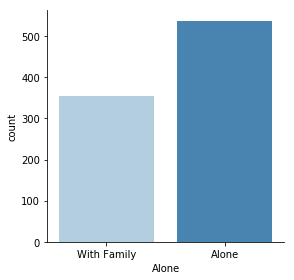

In [23]:
# Now let's get a simple visualization!
sns.factorplot('Alone',kind='count',data=titanicDF,palette='Blues')

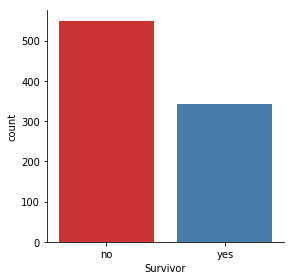

In [24]:
"""
Let's go ahead and take a look at the most interesting (and open-ended) question:
What factors helped someone survive the sinking?
"""

# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanicDF["Survivor"] = titanicDF.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',kind='count',data=titanicDF,palette='Set1')

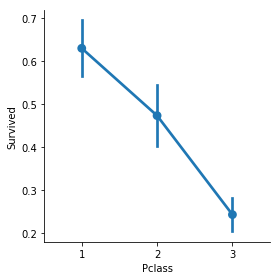

In [25]:
"""
So quite a few more people died than those who survived. Let's see if the class of the passengers
had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd
class passengers did not do as well as their 1st and 2nd class counterparts.
"""

# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanicDF)

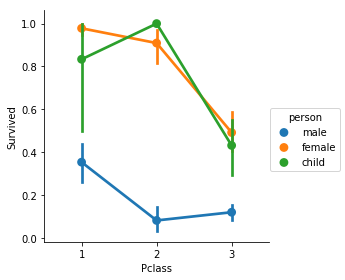

In [26]:
"""
Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being
caused by the large amount of men in the 3rd class in combination with the women and children
first policy. Let's use 'hue' to get a clearer picture on this.
"""
sns.factorplot('Pclass','Survived',hue='person',data=titanicDF)

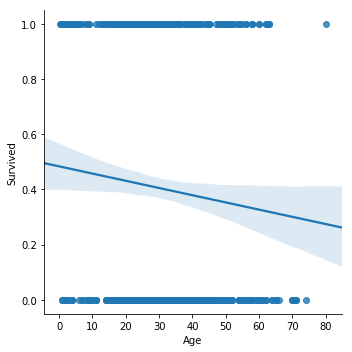

In [27]:
"""
From this data it looks like being a male or being in 3rd class were both not favourable for survival.
Even regardless of class the result of being a male in any class dramatically decreases your chances of
survival.

But what about age? Did being younger or older have an effect on survival rate?
"""

sns.lmplot('Age','Survived',data=titanicDF)

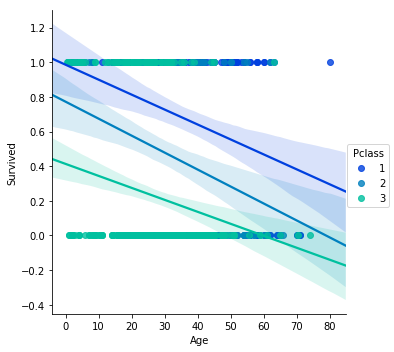

In [28]:
"""
Looks like there is a general trend that the older the passenger was, the less likely they
survived. Let's go ahead and use hue to take a look at the effect of class and age.
"""

# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanicDF,palette='winter')

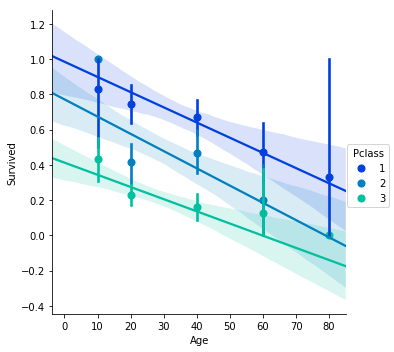

In [29]:
# We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanicDF,palette='winter',x_bins=generations)

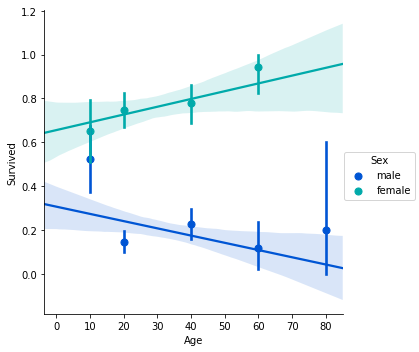

In [30]:
# Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

sns.lmplot('Age','Survived',hue='Sex',data=titanicDF,palette='winter',x_bins=generations)

In [31]:
# https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
deckSurvivalDF = titanicDF[['Survived', 'Cabin']].copy().dropna()

In [32]:
# https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame
deckSurvivalDF = deckSurvivalDF.reset_index(drop=True)

In [33]:
def deck_finder(cabin):
    return cabin[0][0]

In [34]:
deckSurvivalDF['Deck'] = deckSurvivalDF[['Cabin']].apply(deck_finder,axis=1)

In [35]:
deckSurvivalDF2=deckSurvivalDF.replace(1,'Yes').replace(0,'No')

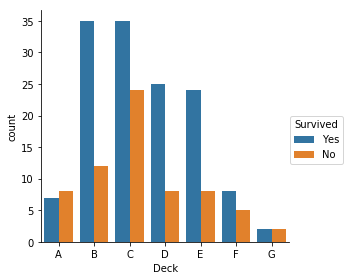

In [36]:
sns.factorplot('Deck',kind='count',data=deckSurvivalDF2,hue='Survived',order=['A','B','C','D','E','F','G'])